## Some Math

Let's assume all objects are always centered at $x=0$ to simplify the FFT handling. 

We need a few relations to understand the math. 

1. The Fourier transform of a function like $x^2W(x)$ is $F[x^2W(x)] \propto \frac{d^2\hat{W}(k)}{dk^2}$.
2. The Fourier transform of a Gaussian is a Gaussian, which we can write generically as $\exp(-\alpha^2 k^2)$. Here $\alpha$ is related to the real-space FWHM of the profile via some constants we won't bother with.
3. A convolution in real-space is a product in Fourier space.
4. A weighted sum over a profile in real-space can be written as an integral in Fourier space.

This last relation is worth discussin in detail. Suppose we have an image $I(x)$, a weight function $W(x)$, and we want to compute the integral $f = \int dx I(x) W(x)$. This integral is actuall the value of the convolution of $I(x)$ with $W(x)$ at $x=0$,

$$
f = \int dx I(x) W(x) = \left. \int dx I(x) W(x - y)\right|_{y = 0}
$$

In Fourier space we can write this relation as 

$$
f \propto \left.\int dk \hat{I}(k)\hat{W}(k) \exp(-iky)\right|_{y=0} = \int dk \hat{I}(k)\hat{W}(k)
$$

So this property combined item 1 above means we can write the weighted moments of an object in real-space as integrals in Fourier space over the weight function and its derivatives

$$
f \propto \int dk \hat{I}(k)\hat{W}(k)
$$

$$
<x^2> \propto \int dk \hat{I}(k)\frac{d^{2}\hat{W}(k)}{dk_x^2}
$$

$$
<xy> \propto \int dk \hat{I}(k)\frac{d^2\hat{W}(k)}{dk_x dk_y}
$$

$$
<y^2> \propto \int dk \hat{I}(k)\frac{d^2\hat{W}(k)}{dk_y^2}
$$


## What about the PSF?

So now let's assume we have an object, a PSF, and a weight function. Further, let's assume that the weight function is always bigger than the PSF and that the weight function is Gaussian.

In this case, we can immediately see that all of the derivatives of the weight function in Fourier space can be written as a product of some polynomial and the weight function iself. The constraint that the weight function be larger than the PSF means that $\alpha_{psf} < \alpha_{w}$. Finally, we have some object with $\alpha_g$. 

In terms of the profile of $k$ we have the following situation illustrated in the plot below.

/Users/beckermr/miniconda3/envs/ngmix-dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/beckermr/miniconda3/envs/ngmix-dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/beckermr/miniconda3/envs/ngmix-dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


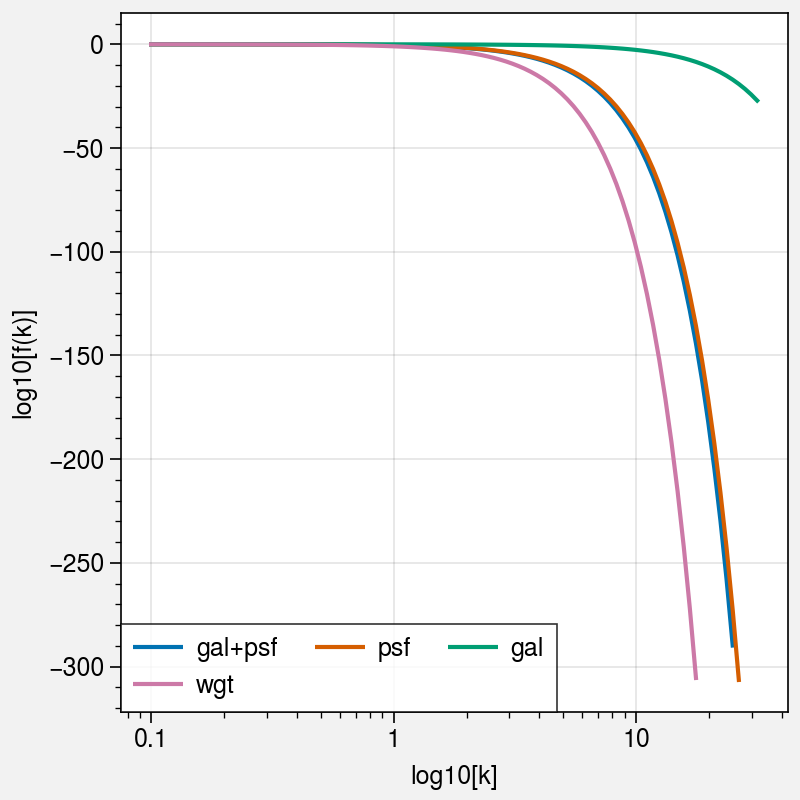

In [17]:
import proplot as plot
import numpy as np

def prof(k, a):
    return np.log10(np.exp(-(a*k)**2))

k = np.logspace(-1, 1.5, 100)
apsf = 1
aw = 1.5
ag = 0.25

fig, axs = plot.subplots(figsize=(4, 4))
axs.semilogx(k, prof(k, np.sqrt(ag**2+apsf**2)), label='gal+psf')
axs.semilogx(k, prof(k, apsf), label='psf')
axs.semilogx(k, prof(k, ag), label='gal')
axs.semilogx(k, prof(k, aw), label='wgt')
axs.format(xlabel='log10[k]', ylabel='log10[f(k)]')
axs.legend()

From this plot you can see that even for real-space moments, as long as the Fourier transforms of the moment kernels are broader than PSF, we remove modes suppressed by the PSF. Thus we can set these suppressed modes (where the PSF amplitude cannot be deconvolved) in Fourier space to zero without harm.